In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head(4)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000


In [4]:
 df.isnull().sum() # Age has missing values

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_7264\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [6]:
df.isnull().sum() # no missing values

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.iloc[:, 1:3]
Y = df.iloc[:, 0]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [9]:
print(f"shape of X_train : {X_train.shape} and shape of Y_train is : {Y_train.shape}")

shape of X_train : (712, 2) and shape of Y_train is : (712,)


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_7264\3268057484.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


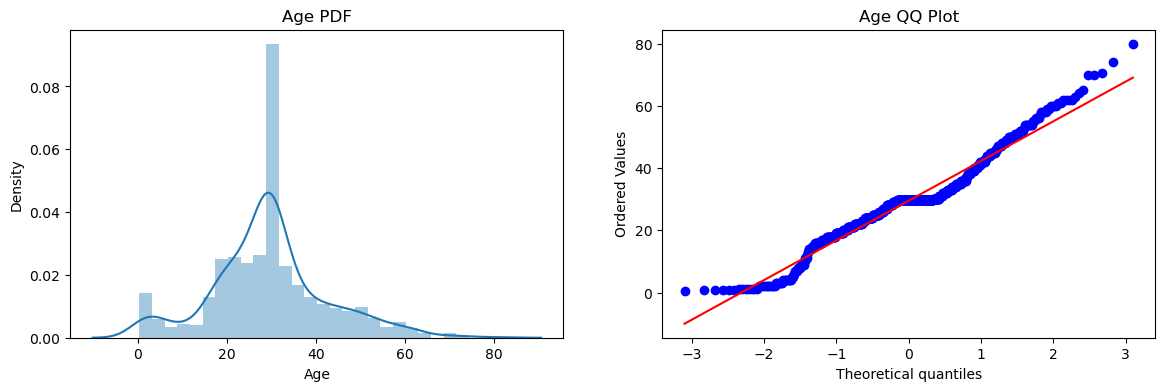

In [10]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_7264\1303672750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


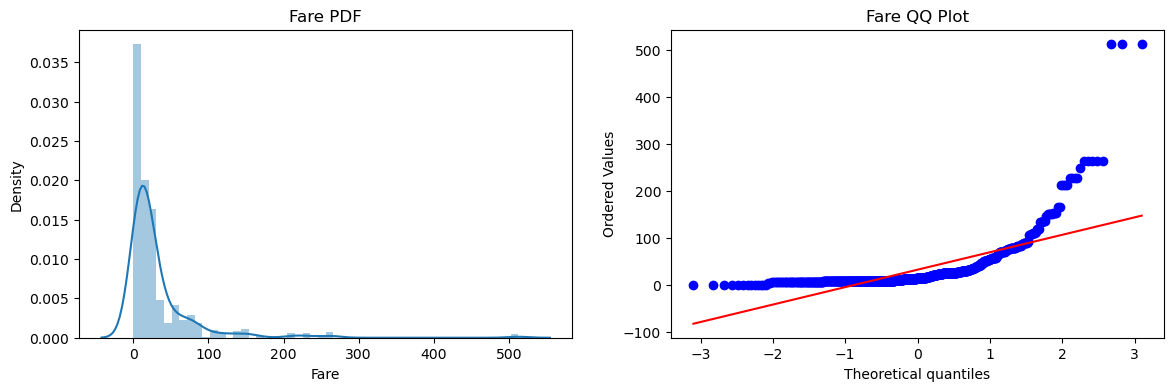

In [11]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()


In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR: ", accuracy_score(Y_test, y_pred))
print("Accuracy DTC: ", accuracy_score(Y_test, y_pred2))


Accuracy LR:  0.6480446927374302
Accuracy DTC:  0.6703910614525139


In [14]:
trf = FunctionTransformer(func = np.log1p)


In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)


In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, Y_train)
clf2.fit(X_train_transformed, Y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR: ", accuracy_score(Y_test, y_pred))
print("Accuracy DTC: ", accuracy_score(Y_test, y_pred2))


Accuracy LR:  0.6815642458100558
Accuracy DTC:  0.6759776536312849


In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, Y, scoring='accuracy', cv=10)))
print("DTC", np.mean(cross_val_score(clf2, X_transformed, Y, scoring='accuracy', cv=10)))


LR 0.678027465667915
DTC 0.658876404494382


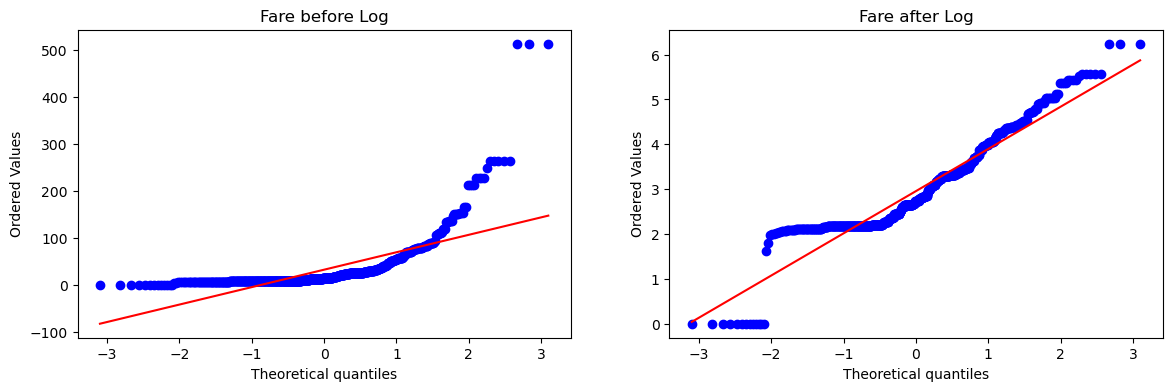

In [18]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title("Fare after Log")

plt.show()

Text(0.5, 1.0, 'Age after Log')

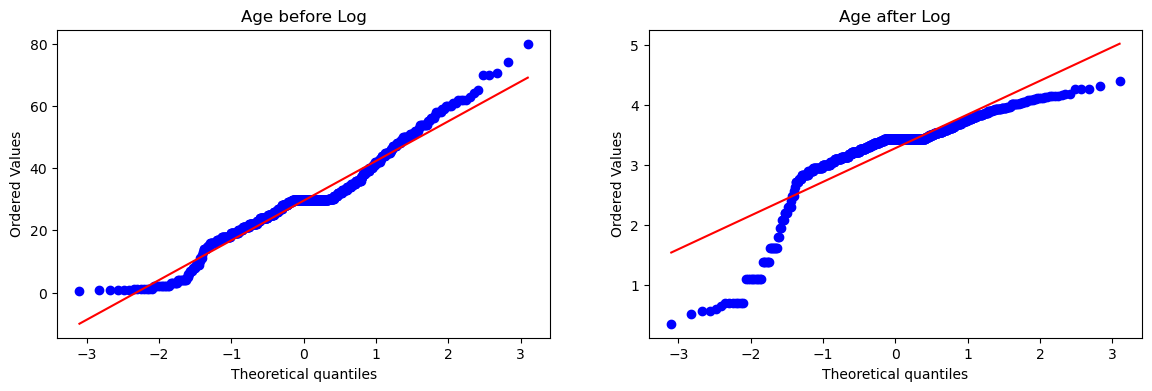

In [19]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title("Age after Log")


In [20]:
trf2 = ColumnTransformer([
    ('Log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

In [21]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [23]:
clf.fit(X_train_transformed2, Y_train)
clf2.fit(X_train_transformed2, Y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy using LR : ", accuracy_score(Y_test, y_pred))
print("Accuracy using DT : ", accuracy_score(Y_test, y_pred2))


Accuracy using LR :  0.6703910614525139
Accuracy using DT :  0.6480446927374302


In [24]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, Y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, Y, scoring='accuracy', cv=10)))


LR 0.6712609238451936
DT 0.6644444444444444


In [25]:
def apply_transform(transform) :
    X = df.iloc[:, 1:3]
    Y = df.iloc[:, 0]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder = 'passthrough')

    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    print('Accuracy', np.mean(cross_val_score(clf, X_trans, Y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


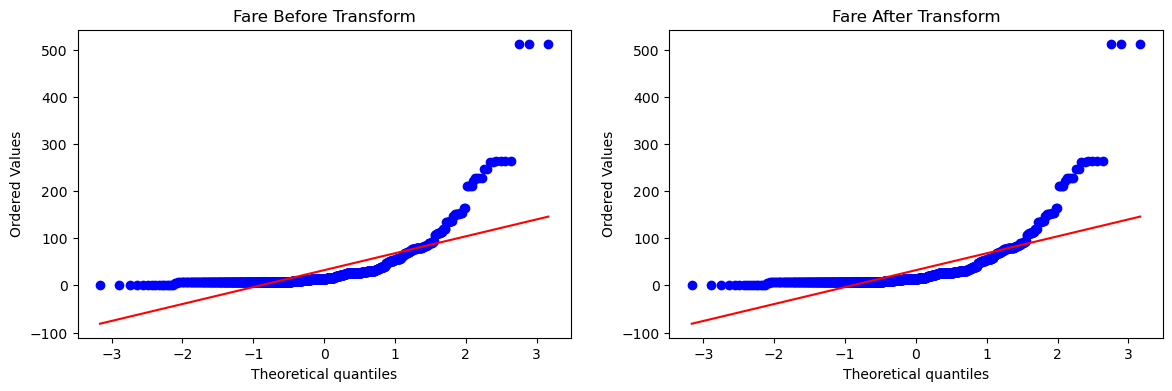

In [26]:
apply_transform(lambda x: x) # no transform

Accuracy 0.6589013732833957


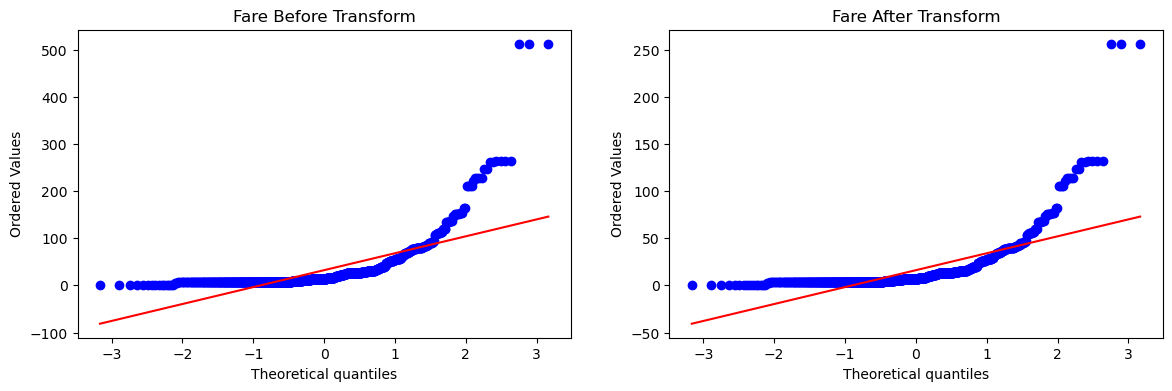

In [27]:
apply_transform(lambda x: x**1/2) # square root Transform

Accuracy 0.61729088639201


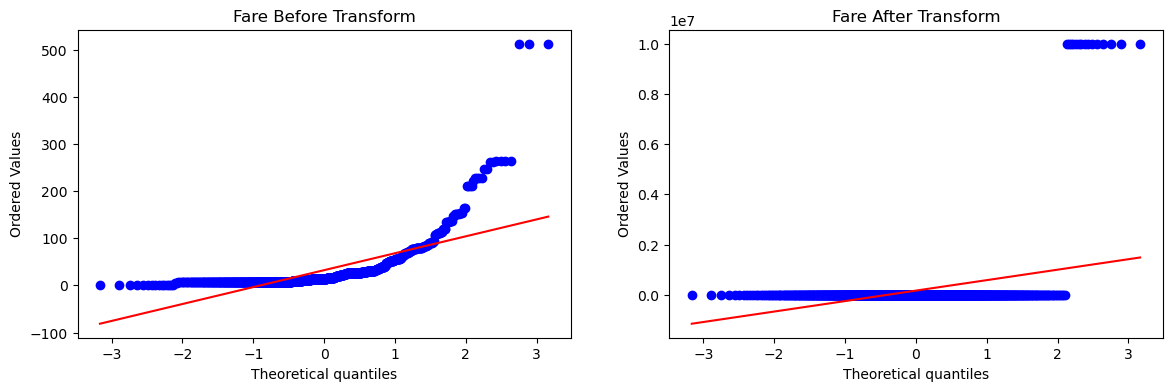

In [28]:
apply_transform(lambda x: 1/(x+0.0000001))


Accuracy 0.6195131086142323


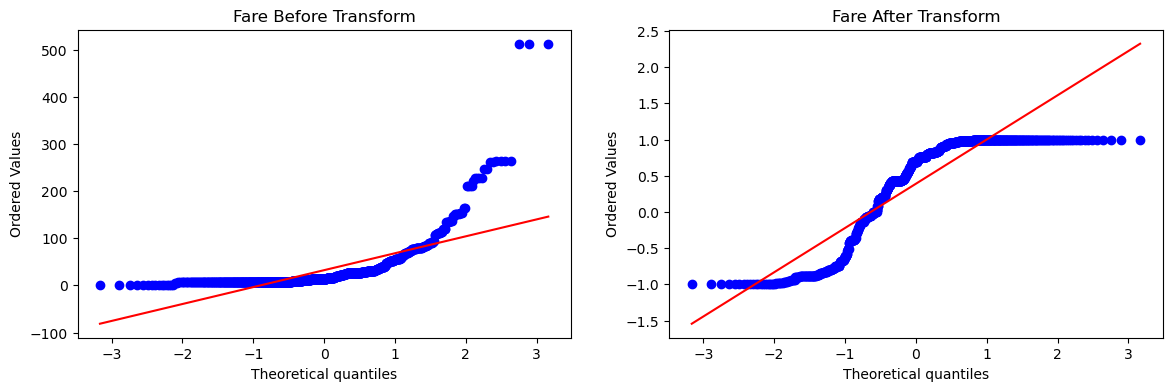

In [29]:
apply_transform(np.sin)
